In [1]:
import sys
sys.path.append("..")

In [2]:
import geopandas as gpd
from fractopo import branches_and_nodes
from pathlib import Path
import matplotlib.pyplot as plt
from shapely.geometry import Polygon, LineString

/home/nialov/.local/share/virtualenvs/fractopo-YImANkM_/lib/python3.8/site-packages/geopandas/_compat.py:84: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.8.1-CAPI-1.13.3). Conversions between both will be slow.
  warnings.warn(


In [3]:
ls = LineString([(0,0), (1,1), (2,2)])

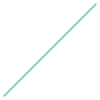

In [4]:
ls

In [5]:
for p in ls.coords:
    print(p)

(0.0, 0.0)
(1.0, 1.0)
(2.0, 2.0)


In [8]:
ls_coords = [p for p in ls.coords]

In [10]:
ls_coords[0] = (-1, -1)

In [11]:
ls_coords

[(-1, -1), (1.0, 1.0), (2.0, 2.0)]

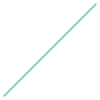

In [12]:
LineString(ls_coords)